In [15]:
import geopandas as gpd
import pandas as pd

# Specify the path to your GeoPackage file
file_path = 'ridewgps_kaikki_kesa.gpkg'

# Read the GeoPackage file into a GeoDataFrame
gdf = gpd.read_file(file_path)

# Convert the datetime column to pandas datetime type if needed
gdf['datetime'] = pd.to_datetime(gdf['created_at'])

# Filter rows based on date range (before 2021 and after 2023)
gdf_filtered = gdf[(gdf['datetime'] >= '2012-01-01') & (gdf['datetime'] <= '2023-12-31')]

In [17]:
gdf.head(1)

,id,user_id,distance,created_at,layer,path,geometry,datetime
0,96560130,1076727,22719.1,2022-07-15 15:15:48,ridewgps_kaikki_pyha,C:\Users\mikko\Documents\Gradu\ridewgps\ridewg...,"LINESTRING (510355.896 7433697.096, 510357.852...",2022-07-15 15:15:48


In [19]:
gdf['distance'].sum() / 1000

23832.067320000002

In [12]:
gdf_filtered.head()

,id,distance,created_at,geometry,datetime
1,96560130,22719.10,2022-07-15 15:15:48,"LINESTRING (27.23771 67.02061, 27.23775 67.020...",2022-07-15 15:15:48
2,125561859,1121.16,2023-06-22 19:37:27,"LINESTRING (27.23367 67.03555, 27.23366 67.035...",2023-06-22 19:37:27
3,86851589,6480.62,2022-04-11 13:03:20,"LINESTRING (27.23670 67.02023, 27.23657 67.020...",2022-04-11 13:03:20
5,134151174,52689.60,2023-09-10 12:27:00,"LINESTRING (27.25267 66.99141, 27.25275 66.991...",2023-09-10 12:27:00
6,125561862,11099.40,2023-06-22 19:37:28,"LINESTRING (27.27651 67.02948, 27.27648 67.029...",2023-06-22 19:37:28


In [20]:
# Extract month and year from datetime column
gdf['month_year'] = gdf['datetime'].dt.to_period('M')
gdf['year'] = gdf['datetime'].dt.to_period('Y')

# Group by month/year and create separate dataframes for each group
dfs_by_year = {group: df for group, df in gdf.groupby('year')}
gdf.head()

,id,user_id,distance,created_at,layer,path,geometry,datetime,month_year,year
0,96560130,1076727,22719.10,2022-07-15 15:15:48,ridewgps_kaikki_pyha,C:\Users\mikko\Documents\Gradu\ridewgps\ridewg...,"LINESTRING (510355.896 7433697.096, 510357.852...",2022-07-15 15:15:48,2022-07,2022
1,125561859,6113002,1121.16,2023-06-22 19:37:27,ridewgps_kaikki_pyha,C:\Users\mikko\Documents\Gradu\ridewgps\ridewg...,"LINESTRING (510173.549 7435362.552, 510173.425...",2023-06-22 19:37:27,2023-06,2023
2,134151174,734021,52689.60,2023-09-10 12:27:00,ridewgps_kaikki_pyha,C:\Users\mikko\Documents\Gradu\ridewgps\ridewg...,"LINESTRING (511021.064 7430444.772, 511024.160...",2023-09-10 12:27:00,2023-09,2023
3,125561862,6113002,11099.40,2023-06-22 19:37:28,ridewgps_kaikki_pyha,C:\Users\mikko\Documents\Gradu\ridewgps\ridewg...,"LINESTRING (512041.657 7434693.211, 512040.390...",2023-06-22 19:37:28,2023-06,2023
4,125561897,6113002,18631.70,2023-06-22 19:37:28,ridewgps_kaikki_pyha,C:\Users\mikko\Documents\Gradu\ridewgps\ridewg...,"LINESTRING (496121.480 7448594.699, 496121.826...",2023-06-22 19:37:28,2023-06,2023


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021'),
  Text(7, 0, '2022'),
  Text(8, 0, '2023')])

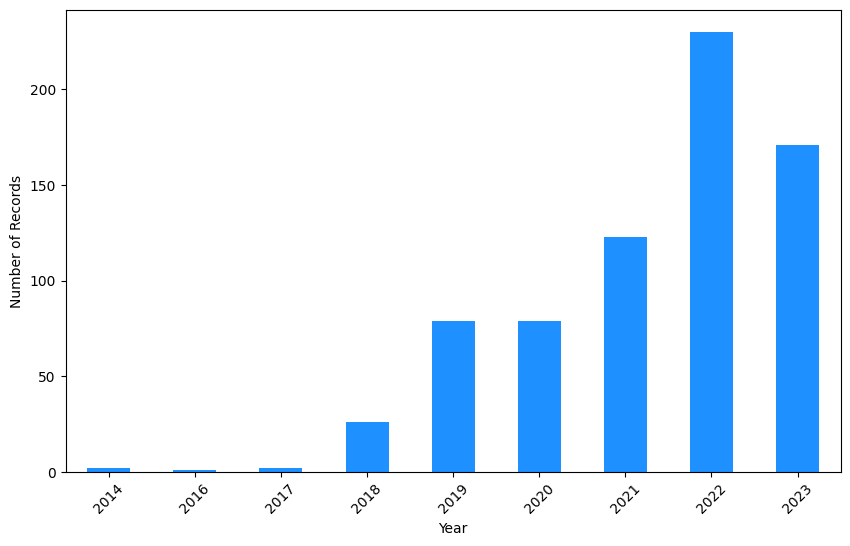

In [28]:
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and the year column is named 'year'
# Replace 'df' with your actual dataframe and 'year' with your column name

# Group by year and count the records
year_counts = gdf['year'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10,6))
year_counts.plot(kind='bar', color='dodgerblue')

# Customize the chart
#plt.title('Ride with GPS records per year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)

# Show the plot

In [7]:
gdf_filtered.to_file("ridewgps_kaikki_kuukaudet")

,id,user_id,distance,created_at,layer,path,geometry,datetime,month_year
1,96560130,1076727,22719.10,2022-07-15 15:15:48,ridewgps_kaikki_pyha,C:\Users\mikko\Documents\Gradu\ridewgps\ridewg...,"LINESTRING (510355.896 7433697.096, 510357.852...",2022-07-15 15:15:48,2022-07
2,125561859,6113002,1121.16,2023-06-22 19:37:27,ridewgps_kaikki_pyha,C:\Users\mikko\Documents\Gradu\ridewgps\ridewg...,"LINESTRING (510173.549 7435362.552, 510173.425...",2023-06-22 19:37:27,2023-06
4,134151174,734021,52689.60,2023-09-10 12:27:00,ridewgps_kaikki_pyha,C:\Users\mikko\Documents\Gradu\ridewgps\ridewg...,"LINESTRING (511021.064 7430444.772, 511024.160...",2023-09-10 12:27:00,2023-09
5,125561862,6113002,11099.40,2023-06-22 19:37:28,ridewgps_kaikki_pyha,C:\Users\mikko\Documents\Gradu\ridewgps\ridewg...,"LINESTRING (512041.657 7434693.211, 512040.390...",2023-06-22 19:37:28,2023-06
7,116832265,4784972,31087.80,2023-04-02 15:08:49,ridewgps_kaikki_pyha,C:\Users\mikko\Documents\Gradu\ridewgps\ridewg...,"LINESTRING (510875.143 7433472.939, 510875.665...",2023-04-02 15:08:49,2023-04


In [6]:
# Iterate over the dictionary to access and work with each dataframe
for period, df in dfs_by_month_year.items():
    # Extract the string representation of the period (e.g., '2021-01')
    month_year_str = str(period)
    
    # Perform operations on the dataframe for the current month/year
    print(f"Dataframe for {month_year_str}:")
    print(df.head())  # Display the first few rows of the dataframe
    
    # Additional operations can be performed here based on your analysis requirements
    # For example, calculate summary statistics, plot graphs, etc.

Dataframe for 2012-04:
          id  user_id  distance          created_at                  layer  \
2298  602762    50473   2057.93 2012-04-20 19:43:03  ridewgps_kaikki_yllas   

                                                   path  \
2298  C:/Users/mikko/Documents/Gradu/ridewgps/ridewg...   

                                               geometry            datetime  \
2298  LINESTRING (381843.478 7496881.955, 381847.338... 2012-04-20 19:43:03   

     month_year  
2298    2012-04  
Dataframe for 2013-03:
           id  user_id  distance          created_at                  layer  \
1991  1192052   145190  11469.00 2013-03-21 07:53:27  ridewgps_kaikki_yllas   
1996  1192053   145190   4878.04 2013-03-21 08:02:27  ridewgps_kaikki_yllas   
1997  1192054   145190   9242.38 2013-03-21 08:02:32  ridewgps_kaikki_yllas   
1999  1192055   145190   6226.18 2013-03-21 08:02:35  ridewgps_kaikki_yllas   

                                                   path  \
1991  C:/Users/mikko/Documen

In [15]:
# Create a new dictionary to store dataframes for each month
monthly_dataframes = {}

# Iterate over the keys in dfs_by_month_year dictionary
for period, df in dfs_by_month_year.items():
    # Extract the year and month from the period object
    year = period.year
    month = period.month
    
    # Create a key based on the month name (e.g., 'January 2021')
    month_name = f"{pd.Timestamp(year=year, month=month, day=1):%B %Y}"
    
    # Store the dataframe in the monthly_dataframes dictionary under the month name key
    monthly_dataframes[month_name] = df

# Now monthly_dataframes contains separate dataframes for each month
# You can access a specific month's dataframe using its name (e.g., 'January 2021')
july_2021_df = monthly_dataframes['July 2023']


In [16]:
july_2021_df.tail()

,id,distance,created_at,geometry,datetime,month_year
59,127418530,10259.0,2023-07-09 20:37:10,"LINESTRING (27.24266 67.02032, 27.24263 67.020...",2023-07-09 20:37:10,2023-07
292,129299202,16803.5,2023-07-26 16:13:09,"LINESTRING (27.25612 67.00434, 27.25610 67.004...",2023-07-26 16:13:09,2023-07
319,127491921,34850.8,2023-07-10 14:11:34,"LINESTRING (27.24261 67.02022, 27.24261 67.020...",2023-07-10 14:11:34,2023-07


In [17]:
import pandas as pd

# Create a new dictionary to store combined dataframes for each month
monthly_dataframes = {}

# Iterate over the keys in dfs_by_month_year dictionary
for period, df in dfs_by_month_year.items():
    # Extract the month name (e.g., 'July')
    month_name = period.strftime('%B')
    
    # Check if the month_name key exists in the monthly_dataframes dictionary
    if month_name not in monthly_dataframes:
        # If the key doesn't exist, initialize an empty dataframe
        monthly_dataframes[month_name] = pd.DataFrame()
    
    # Concatenate the current dataframe (df) with the existing dataframe for the month
    monthly_dataframes[month_name] = pd.concat([monthly_dataframes[month_name], df], ignore_index=True)

# Now monthly_dataframes contains combined dataframes for each month across all years
# You can access a specific month's combined dataframe using its name (e.g., 'July')
    
july_combined_df = monthly_dataframes['July']
june_combined_df = monthly_dataframes['June']
august_combined_df = monthly_dataframes['August']
september_combined_df = monthly_dataframes['September']
october_combined_df = monthly_dataframes['October']

# Perform operations on the combined dataframe for July (across all years)
print(july_combined_df.head())


         id  distance          created_at  \
0  71715093  19425.90 2021-07-22 10:13:59   
1  72050991  19425.90 2021-07-27 11:17:40   
2  96560130  22719.10 2022-07-15 15:15:48   
3  95655992  41139.00 2022-07-06 21:57:34   
4  97923707   6718.34 2022-07-28 16:59:09   

                                            geometry            datetime  \
0  LINESTRING (26.92317 67.15807, 26.92317 67.158... 2021-07-22 10:13:59   
1  LINESTRING (26.92317 67.15807, 26.92317 67.158... 2021-07-27 11:17:40   
2  LINESTRING (27.23771 67.02061, 27.23775 67.020... 2022-07-15 15:15:48   
3  LINESTRING (26.91105 67.15450, 26.91105 67.154... 2022-07-06 21:57:34   
4  LINESTRING (26.91038 67.15446, 26.91040 67.154... 2022-07-28 16:59:09   

  month_year  
0    2021-07  
1    2021-07  
2    2022-07  
3    2022-07  
4    2022-07  


In [18]:
june_combined_df=june_combined_df[['id', 'distance', 'created_at', 'geometry']]
# Select specific columns for July DataFrame
july_combined_df = july_combined_df[['id', 'distance', 'created_at', 'geometry']]

# Select specific columns for August DataFrame
august_combined_df = august_combined_df[['id', 'distance', 'created_at', 'geometry']]

# Select specific columns for September DataFrame
september_combined_df = september_combined_df[['id', 'distance', 'created_at', 'geometry']]

# Select specific columns for October DataFrame
october_combined_df = october_combined_df[['id', 'distance', 'created_at', 'geometry']]


In [19]:
june_combined_df=june_combined_df.to_crs('EPSG:3067')
july_combined_df=july_combined_df.to_crs('EPSG:3067')
august_combined_df=august_combined_df.to_crs('EPSG:3067')
september_combined_df=september_combined_df.to_crs('EPSG:3067')
october_combined_df=october_combined_df.to_crs('EPSG:3067')

In [20]:
june_combined_df.to_file('pyha_ridewgps_june.gpkg')
july_combined_df.to_file('pyha_ridewgps_july.gpkg')
august_combined_df.to_file('pyha_ridewgps_august.gpkg')
september_combined_df.to_file('pyha_ridewgps_september.gpkg')
october_combined_df.to_file('pyha_ridewgps_october.gpkg')
